In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('master_table.csv', index_col='primary_title')
df.shape

(17172, 33)

# Adding profit column

In [3]:
df['Cumulative Worldwide Gross'].dtype

dtype('int64')

In [4]:
df

,Country,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,start_year,runtime_minutes,genres,averagerating,numvotes,...,Comedy,Biography,History,Sport,Crime,Documentary,Sci-Fi,Horror,Family,Western
primary_title,,,,,,,,,,,,,,,,,,,,,
Jurassic World,USA,150000000,208806270,652270625,1670401444,2015,124.0,"['Action', 'Adventure', 'Sci-Fi']",7.0,539338.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
John Carter,USA,250000000,30180188,73078100,284139100,2012,132.0,"['Action', 'Adventure', 'Sci-Fi']",6.6,241792.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Alice in Wonderland,USA,200000000,116101023,334191110,1025467803,2010,108.0,"['Adventure', 'Family', 'Fantasy']",6.5,358813.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Gou yan kan ren xin,Hong Kong,0,0,0,2704326,2019,91.0,['Drama'],NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My First Client,South Korea,0,0,0,1424100,2019,114.0,['Drama'],NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Goodachari,India,600000,0,0,44969,2018,147.0,"['Action', 'Thriller']",7.8,5412.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"I Was at Home, But",Germany,0,6115,14078,14078,2019,105.0,['Drama'],4.8,205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sajjan Singh Rangroot,India,2025000,0,0,639685,2018,140.0,"['Action', 'Biography', 'Drama']",7.7,1190.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20,20));

In [6]:
#sns.pairplot(df, hue="Country", diag_kind="hist")

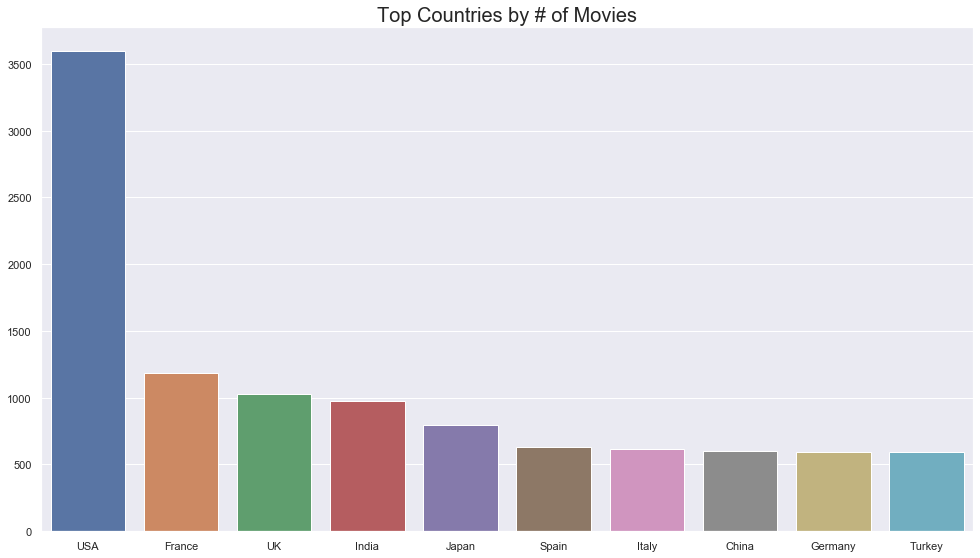

In [7]:
movie_count_by_country = df['Country'].value_counts()
sns.set(style="whitegrid")
y = movie_count_by_country[:10].values
x = movie_count_by_country[:10].index
sns.set(rc={'figure.figsize':(16.7,9.27)})

sns.barplot(x,y).set_title('Top Countries by # of Movies', size=20);

# Total Money Spent on Movies Per Country

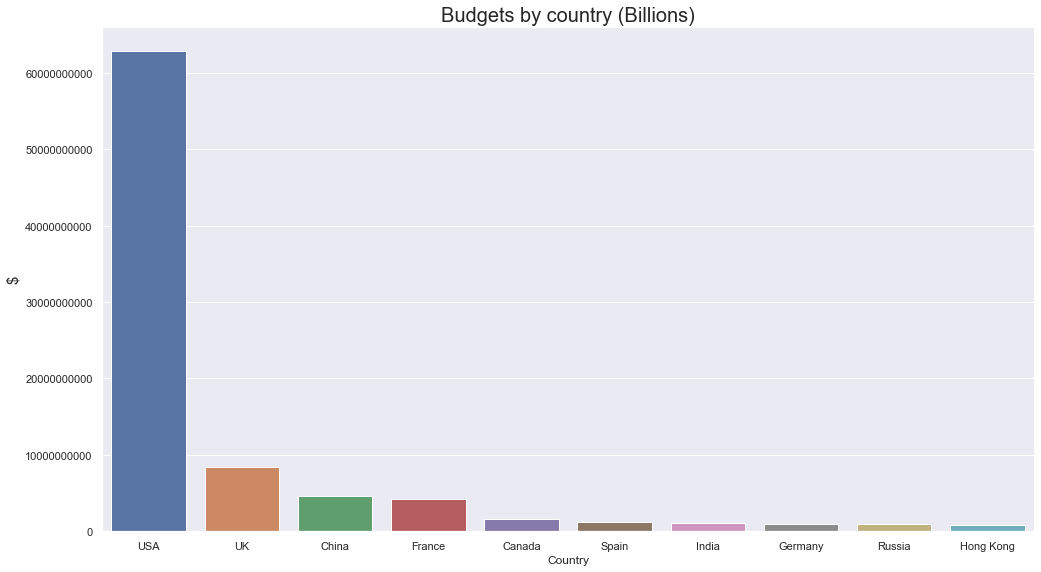

In [8]:
most_money_spent_by_country = df['Budget'].groupby(df['Country']).sum().sort_values(ascending=False)

sns.set(style="whitegrid")
y = most_money_spent_by_country[:10].values
x = most_money_spent_by_country[:10].index
sns.set(rc={'figure.figsize':(16.7,9.27)})
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("$", size=15)

sns.barplot(x,y).set_title('Budgets by country (Billions)', size=20);

# Top 10 Highest Grossing Movies

In [9]:
highest_grossing = df.groupby(['primary_title']).sum()['Cumulative Worldwide Gross'].sort_values(ascending=False)[:10]
highest_grossing

primary_title
Avengers: Endgame                               2797800564
Star Wars: Episode VII - The Force Awakens      2068224036
Jurassic World                                  1670401444
The Avengers                                    1518815515
Furious 7                                       1515048151
Frozen II                                       1450026933
Avengers: Age of Ultron                         1402809540
Black Panther                                   1347426059
Harry Potter and the Deathly Hallows: Part 2    1342191687
Star Wars: The Last Jedi                        1332540187
Name: Cumulative Worldwide Gross, dtype: int64

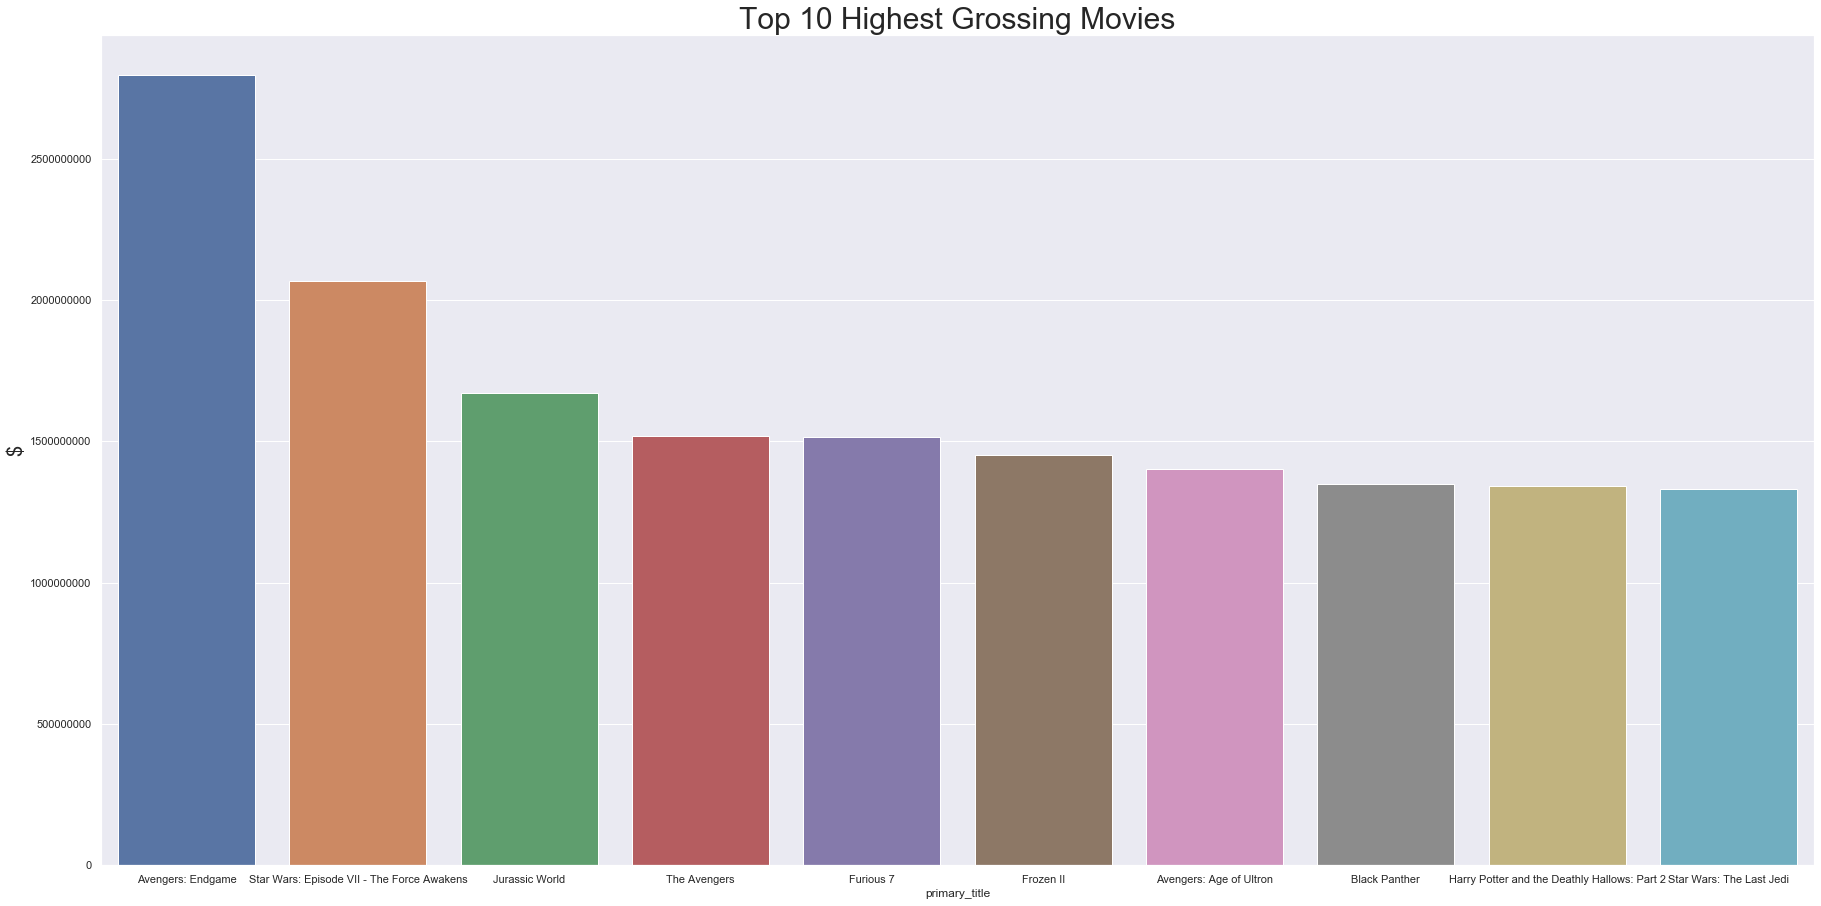

In [10]:
sns.set(style="whitegrid")
y = highest_grossing.values
x = highest_grossing.index
sns.set(rc={'figure.figsize':(30.7,15.27)})
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("$", size=20)

sns.barplot(x,y).set_title('Top 10 Highest Grossing Movies', size=30);

# Movie Releases by Year

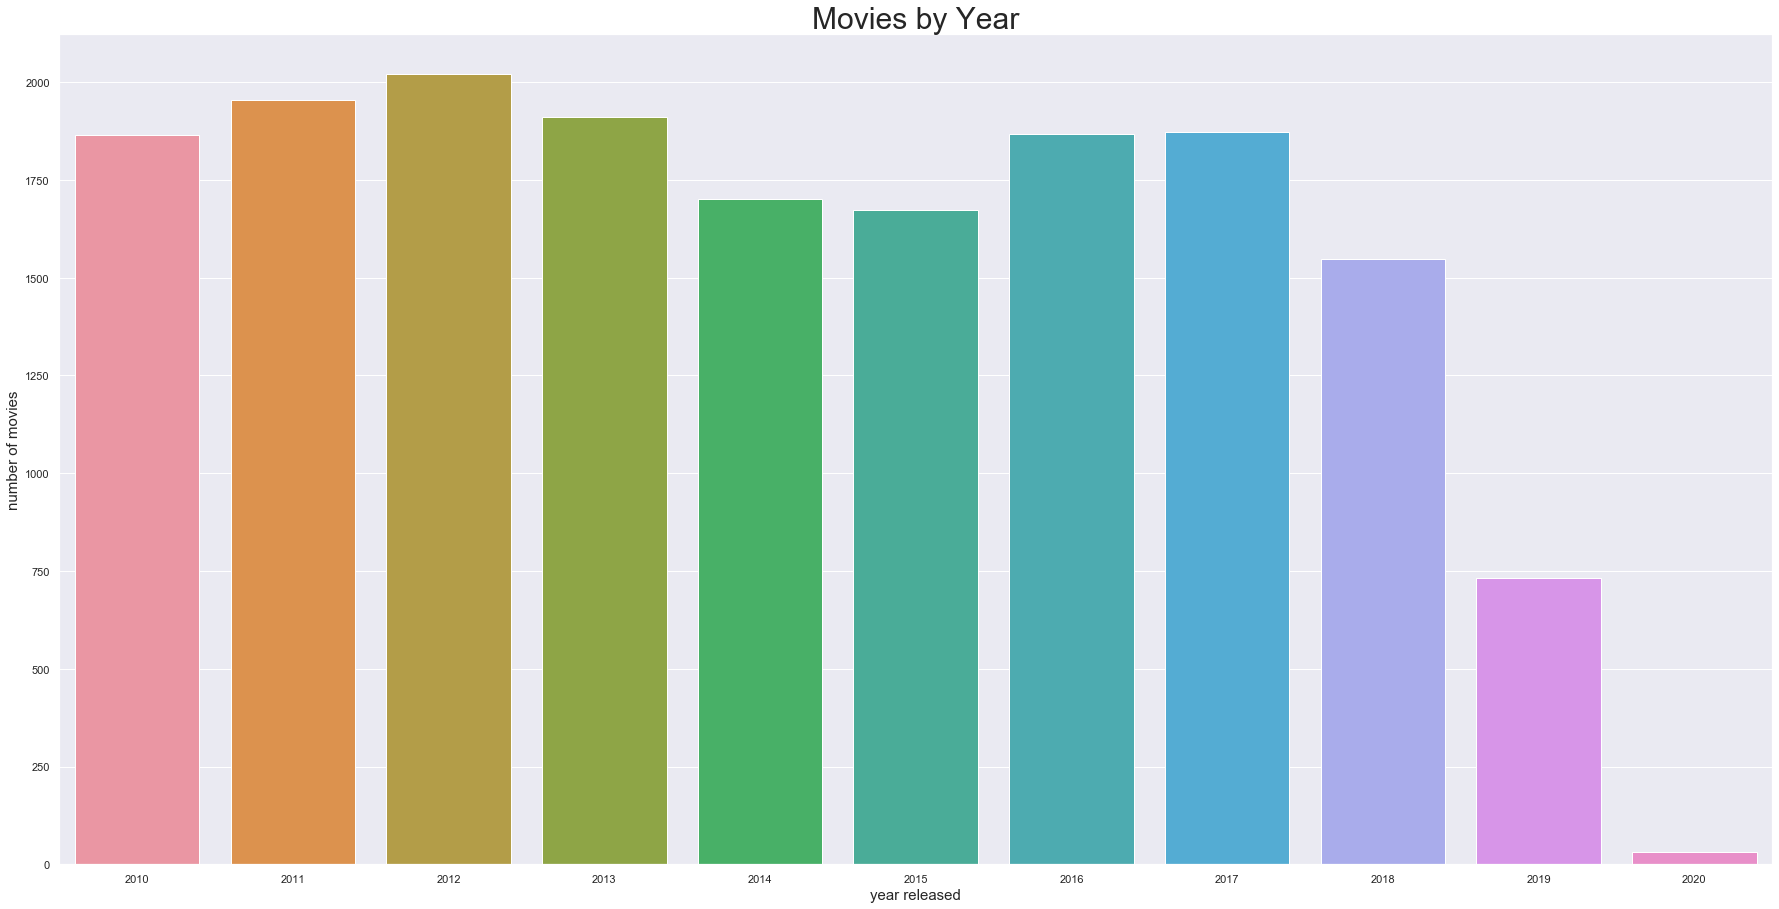

In [11]:
sns.countplot(x="start_year", data=df).set_title('Movies by Year', size=30);
sns.set(rc={'figure.figsize':(15.7,8.27)})
plt.ylabel("number of movies", size=15)
plt.xlabel("year released", size=15);
# sns.set_theme(style="darkgrid")

# More specific plotting..

# Average Rating vs Number of Votes

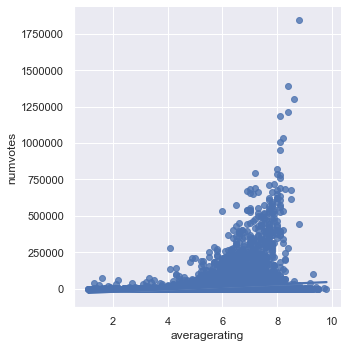

In [12]:
sns.lmplot(x="averagerating", y="numvotes", data=df);

# budget vs profit for movies with rating between 6 and 8

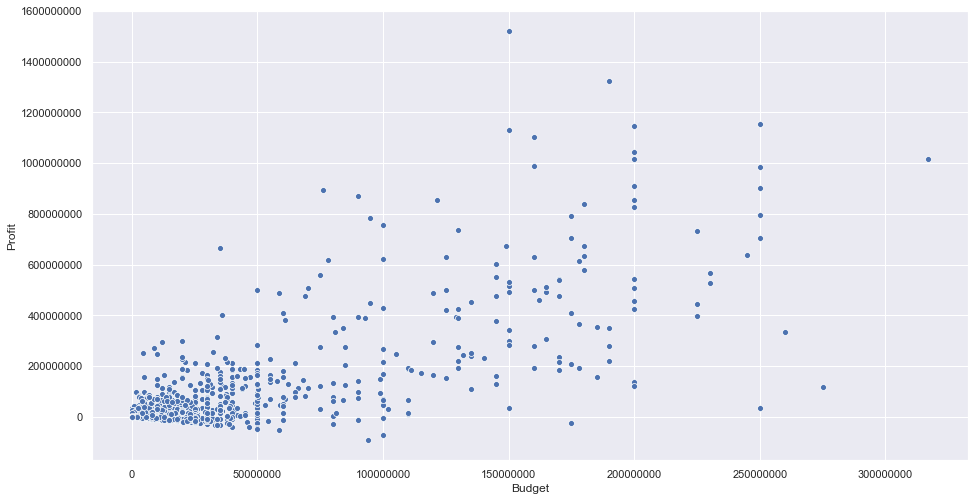

In [13]:
optimal_rating = df.loc[(df['averagerating'] > 6.5) & (df['averagerating'] < 8)]
sns.scatterplot(data=optimal_rating, x="Budget", y="Profit")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

# budget vs profit for movies with rating from 0 to 6.5

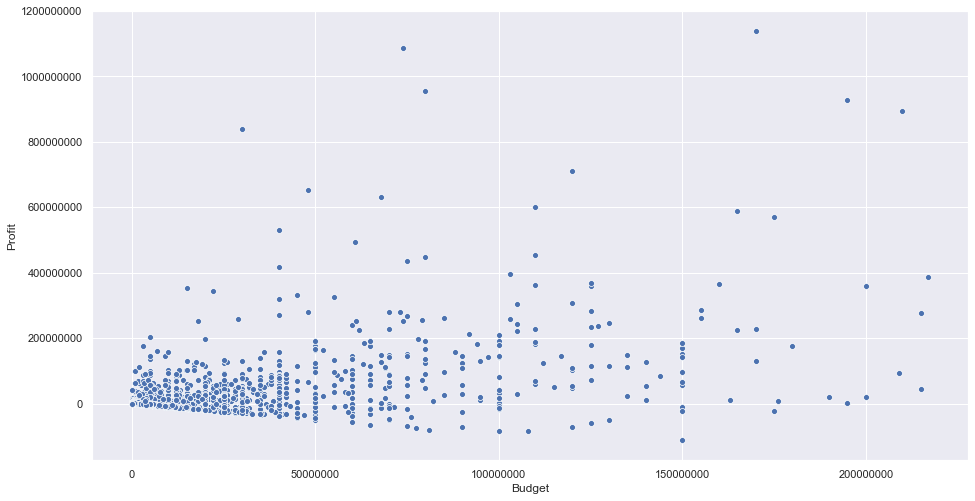

In [14]:
low_rating = df.loc[(df['averagerating'] > 0.0) & (df['averagerating'] < 6.5)]
sns.scatterplot(data=low_rating, x="Budget", y="Profit")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

# budget vs profit for movies with rating greater than 6.5

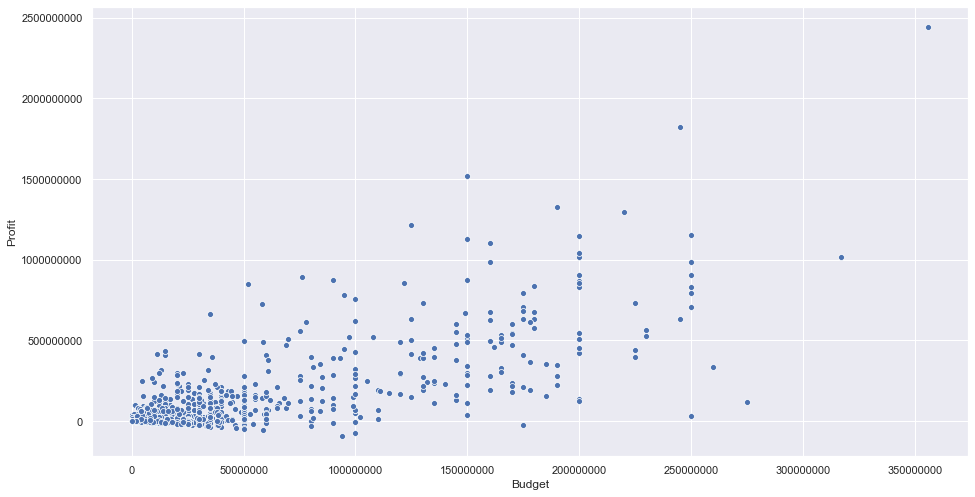

In [15]:
high_rating = df.loc[(df['averagerating'] > 6.5)]
sns.scatterplot(data=high_rating, x="Budget", y="Profit")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

In [16]:
df

,Country,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,start_year,runtime_minutes,genres,averagerating,numvotes,...,Comedy,Biography,History,Sport,Crime,Documentary,Sci-Fi,Horror,Family,Western
primary_title,,,,,,,,,,,,,,,,,,,,,
Jurassic World,USA,150000000,208806270,652270625,1670401444,2015,124.0,"['Action', 'Adventure', 'Sci-Fi']",7.0,539338.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
John Carter,USA,250000000,30180188,73078100,284139100,2012,132.0,"['Action', 'Adventure', 'Sci-Fi']",6.6,241792.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Alice in Wonderland,USA,200000000,116101023,334191110,1025467803,2010,108.0,"['Adventure', 'Family', 'Fantasy']",6.5,358813.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Gou yan kan ren xin,Hong Kong,0,0,0,2704326,2019,91.0,['Drama'],NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My First Client,South Korea,0,0,0,1424100,2019,114.0,['Drama'],NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Goodachari,India,600000,0,0,44969,2018,147.0,"['Action', 'Thriller']",7.8,5412.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"I Was at Home, But",Germany,0,6115,14078,14078,2019,105.0,['Drama'],4.8,205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sajjan Singh Rangroot,India,2025000,0,0,639685,2018,140.0,"['Action', 'Biography', 'Drama']",7.7,1190.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
worst_movies = df['Profit'].groupby(level='primary_title').sum().sort_values(ascending=True)[:10]
worst_movies

primary_title
The Irishman                       -158031147
Mars Needs Moms                    -110766322
The Flowers of War                  -91144356
Live by Night                       -85321445
Saint Seiya: Legend of Sanctuary    -82849197
Ninguém Entra, Ninguém Sai          -80303550
American Renegades                  -74840151
Missing Link                        -73572687
The Nutcracker in 3D                -72822007
How Do You Know                     -71331093
Name: Profit, dtype: int64

In [18]:
top_10_profitable_directors = df.groupby(['director']).sum().sort_values('Profit', ascending=False)[:10]
top_10_profitable_directors

,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,start_year,runtime_minutes,averagerating,numvotes,Profit,Adventure,...,Comedy,Biography,History,Sport,Crime,Documentary,Sci-Fi,Horror,Family,Western
director,,,,,,,,,,,,,,,,,,,,,
David Yates,806500000,469301146,1197993568,4144756575,10071,652.0,36.0,1796023.0,3338256575,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
J.J. Abrams,760000000,530967266,1807647607,3869829516,8058,380.0,22.7,1550890.0,3109829516,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
James Wan,376500000,310459455,963064565,3244512143,10069,601.0,35.3,1391060.0,2868012143,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0
Christopher Nolan,880000000,341896480,1159675976,3426085264,10073,587.0,33.7,4994749.0,2546085264,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
Joss Whedon,470000000,398881759,1086692627,2926966276,6039,393.0,22.6,1864664.0,2451625055,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
Bill Condon,439000000,463653821,1116241747,2878287555,12087,593.0,30.7,756159.0,2439287555,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Peter Jackson,655000000,212986834,834447124,2951256600,8057,573.0,31.5,1739425.0,2276390211,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Michael Bay,648000000,262815833,777873593,2920578857,8055,602.0,23.5,956722.0,2272578857,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
Francis Lawrence,522000000,416333676,1149112056,2547380130,10071,666.0,34.2,1449439.0,2025380130,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0


In [19]:
top_profit_director = df.loc[df['director'] == 'David Yates']
top_profit_director

,Country,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,start_year,runtime_minutes,genres,averagerating,numvotes,...,Comedy,Biography,History,Sport,Crime,Documentary,Sci-Fi,Horror,Family,Western
primary_title,,,,,,,,,,,,,,,,,,,,,
Fantastic Beasts and Where to Find Them,UK,180000000,74403387,234037575,814043616,2016,132.0,"['Adventure', 'Family', 'Fantasy']",7.3,365353.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Harry Potter and the Deathly Hallows: Part 1,UK,121500000,125017372,296347721,976965014,2010,146.0,"['Adventure', 'Fantasy', 'Mystery']",7.7,425530.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Harry Potter and the Deathly Hallows: Part 2,UK,125000000,169189427,381409310,1342191687,2011,130.0,"['Adventure', 'Drama', 'Fantasy']",8.1,691835.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Legend of Tarzan,UK,180000000,38527856,126643061,356700357,2016,110.0,"['Action', 'Adventure', 'Drama']",6.3,150154.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fantastic Beasts: The Crimes of Grindelwald,UK,200000000,62163104,159555901,654855901,2018,134.0,"['Adventure', 'Family', 'Fantasy']",6.6,163151.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
df.loc['Mars Needs Moms']

Country                                                        USA
Budget                                                   150000000
Opening Weekend USA                                        6914488
Gross USA                                                 21392758
Cumulative Worldwide Gross                                39233678
start_year                                                    2011
runtime_minutes                                                 88
genres                        ['Adventure', 'Animation', 'Family']
averagerating                                                  5.4
numvotes                                                     19823
director                                               Simon Wells
Profit                                                  -110766322
Adventure                                                        1
Drama                                                            0
Musical                                                       

In [21]:
df.loc[(df['Sport'] == 1) & (df['Music'] == 1)]

,Country,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,start_year,runtime_minutes,genres,averagerating,numvotes,...,Comedy,Biography,History,Sport,Crime,Documentary,Sci-Fi,Horror,Family,Western
primary_title,,,,,,,,,,,,,,,,,,,,,
Ballet 422,USA,0,27653,333554,333554,2014,75.0,"['Documentary', 'Music', 'Sport']",6.2,1038.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
You'll Never Walk Alone,Germany,0,0,0,45997,2017,99.0,"['Documentary', 'Music', 'Sport']",8.4,25.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
df.loc['El Hijo de Dios']

Country                                            Argentina
Budget                                                  5740
Opening Weekend USA                                        0
Gross USA                                                  0
Cumulative Worldwide Gross                              1267
start_year                                              2016
runtime_minutes                                           90
genres                        ['Comedy', 'Sport', 'Western']
averagerating                                            6.4
numvotes                                                  17
director                                                 NaN
Profit                                                 -4473
Adventure                                                  0
Drama                                                      0
Musical                                                    0
Romance                                                    0
War                     

In [29]:
df['director'].count()

13467